<a href="https://colab.research.google.com/github/Abhishek-M-B/DSA_Assignments/blob/main/HR_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression # classification model
from sklearn.naive_bayes import GaussianNB # classification model
from sklearn.ensemble import RandomForestClassifier  # classification model
from sklearn.tree import DecisionTreeClassifier # classification model
from sklearn.model_selection import GridSearchCV #model fine tuning with Grid Search CV
from sklearn.metrics import f1_score, classification_report,accuracy_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA

In [3]:
train = pd.read_csv('/content/drive/MyDrive/DSA_ICT/Data/train_LZdllcl.csv')
test = pd.read_csv('/content/drive/MyDrive/DSA_ICT/Data/test_2umaH9m.csv')

train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
# Check for missing values and data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
train.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


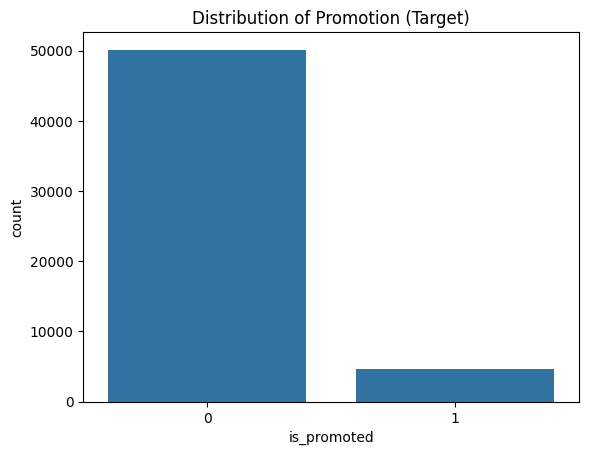

In [6]:
sns.countplot(x='is_promoted', data=train)
plt.title('Distribution of Promotion (Target)')
plt.show()

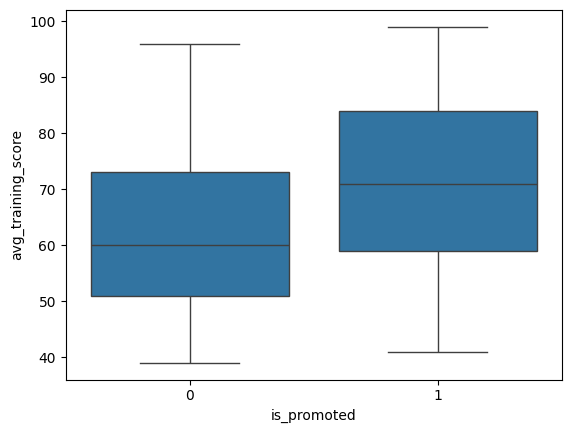

In [7]:
# Visualize Correlation between Training Score and Promotion
sns.boxplot(x='is_promoted', y='avg_training_score', data=train)
plt.show()

# Data Preprocessing for train data

In [8]:
train_df = train.copy()

In [9]:
# 1. Fill Missing Values
train_df['education'] = train_df['education'].fillna(train_df['education'].mode()[0])
train_df['previous_year_rating'] = train_df['previous_year_rating'].fillna(train_df['previous_year_rating'].median())

le = LabelEncoder()
cat_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel']
for col in cat_cols:
    train_df[col] = le.fit_transform(train_df[col])

train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


# Data Preprocessing for test data

In [10]:
# Create a copy
test_df = test.copy()

# 1. Fill Missing Values (using test set's own stats)
test_df['education'] = test_df['education'].fillna(test_df['education'].mode()[0])
test_df['previous_year_rating'] = test_df['previous_year_rating'].fillna(test_df['previous_year_rating'].median())

# 2. Categorical Encoding
for col in cat_cols:
    test_df[col] = le.fit_transform(test_df[col])

test_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,0,1,2,1,24,3.0,1,1,0,77
1,74430,2,28,0,0,0,1,31,3.0,5,0,0,51
2,72255,7,4,0,1,0,1,31,1.0,4,0,0,47
3,38562,5,11,0,0,0,3,31,2.0,9,0,0,65
4,64486,1,21,0,1,2,1,30,4.0,7,0,0,61


# Splitting Features and Target

In [11]:
# Define Features and Target
X = train_df.drop(['employee_id', 'is_promoted'], axis=1)
y = train_df['is_promoted']

# Final test features (remove ID)
X_test_final = test_df.drop(['employee_id'], axis=1)

# Split for  validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(" X_train shape:", X_train.shape)

 X_train shape: (43846, 12)


# Model Selection

## Logistic Regression

In [12]:
model_lr = LogisticRegression(max_iter=2000, class_weight='balanced')
model_lr.fit(X_train, y_train)
preds_lr = model_lr.predict(X_val)

print("--- Logistic Regression Results ---")
print("Accuracy:", accuracy_score(y_val, preds_lr))
print("F1-Score:", f1_score(y_val, preds_lr))



--- Logistic Regression Results ---
Accuracy: 0.7172048896186827
F1-Score: 0.3014871563767463


## Decision Tree

In [13]:
model_dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
model_dt.fit(X_train, y_train)
preds_dt = model_dt.predict(X_val)

print("--- Decision Tree Results ---")
print("Accuracy:", accuracy_score(y_val, preds_dt))
print("F1-Score:", f1_score(y_val, preds_dt))


--- Decision Tree Results ---
Accuracy: 0.9022076263455574
F1-Score: 0.4363827549947424


## Naive Bayes

In [14]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
preds_nb = model_nb.predict(X_val)

print("--- Naive Bayes Results ---")
print("Accuracy:", accuracy_score(y_val, preds_nb))
print("F1-Score:", f1_score(y_val, preds_nb))


--- Naive Bayes Results ---
Accuracy: 0.9136106549899653
F1-Score: 0.2218570254724733


## Random Forest

In [15]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model_rf.fit(X_train, y_train)
preds_rf = model_rf.predict(X_val)

print("--- Random Forest Results ---")
print("Accuracy:", accuracy_score(y_val, preds_rf))
print("F1-Score:", f1_score(y_val, preds_rf))


--- Random Forest Results ---
Accuracy: 0.9360518153621602
F1-Score: 0.4396482813749001


# Fine tuning the best model

In [16]:
# Best model is RandomForest classifier
# 2. Define the "Grid" of parameters to test
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5]
}

# 3. Setup the Grid Search
# scoring='f1' because that is what Analytics Vidhya uses
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid,
                           cv=3, scoring='f1', verbose=2, n_jobs=-1)

# 4. Run the search on the training data
grid_search.fit(X_train, y_train)

# 5. Get the best parameters
print("Best Parameters found:", grid_search.best_params_)
print("Best F1-Score from Grid Search:", grid_search.best_score_)

# Save the best model to a variable
best_tuned_model = grid_search.best_estimator_


tuned_preds = best_tuned_model.predict(X_val)

print("--- Fine-Tuned Model Performance ---")
print("Accuracy:", accuracy_score(y_val, tuned_preds))
print("F1-Score:", f1_score(y_val, tuned_preds))



Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters found: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best F1-Score from Grid Search: 0.4402574831984518
--- Fine-Tuned Model Performance ---
Accuracy: 0.9309432585294655
F1-Score: 0.4542177361211247


# Final Predictions on Test Data

In [17]:
# Predict using the best model found by GridSearchCV
final_test_predictions = best_tuned_model.predict(X_test_final)

# Submission Model

In [19]:
# Create the submission dataframe
# Note: 'test' is your original dataframe loaded from 'test_2umaH9m.csv'
submission = pd.DataFrame({
    'employee_id': test['employee_id'],
    'is_promoted': final_test_predictions
})

# Save to a CSV file (Do not include index)
submission.to_csv('HR_Analytics_tuned.csv', index=False)

print("Submission file 'HR_Analytics_tuned.csv' has been created!")

Submission file 'HR_Analytics_tuned.csv' has been created!
